# Importing Libraries

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
df = pd.read_json("modcloth_final_data.json", lines = True)
df.head()

item_id  waist  size  quality cup size  hips  bra size category bust  \
0   123373   29.0     7      5.0        d  38.0      34.0      new   36   
1   123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2   123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3   123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4   123373    NaN    18      5.0        b   NaN      36.0      new  NaN   

    height         user_name         length    fit  user_id  shoe size  \
0  5ft 6in             Emily     just right  small   991571        NaN   
1  5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2  5ft 7in             Ugggh  slightly long  small   395665        9.0   
3      NaN      alexmeyer626     just right    fit   875643        NaN   
4  5ft 2in        dberrones1  slightly long  small   944840        NaN   

  shoe width review_summary review_text  
0        NaN            NaN         NaN  
1        NaN            NaN         NaN  
2        NaN            NaN         NaN  
3        NaN            NaN         NaN  
4        NaN            NaN         NaN

# Exploratory Data Analysis

In [3]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [4]:
df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [5]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [7]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(),
                            'percentage_missing': (df.isnull().sum()/82790)*100})
missing_data

total_missing  percentage_missing
item_id                     0            0.000000
waist                   79908           96.518903
size                        0            0.000000
quality                    68            0.082136
cup_size                 6255            7.555260
hips                    26726           32.281677
bra_size                 6018            7.268994
category                    0            0.000000
bust                    70936           85.681846
height                   1107            1.337118
user_name                   0            0.000000
length                     35            0.042276
fit                         0            0.000000
user_id                     0            0.000000
shoe_size               54875           66.282160
shoe_width              64183           77.525063
review_summary           6725            8.122962
review_text              6725            8.122962

In [8]:
df.describe()

item_id        waist          size       quality          hips  \
count   82790.000000  2882.000000  82790.000000  82722.000000  56064.000000   
mean   469325.229170    31.319223     12.661602      3.949058     40.358501   
std    213999.803314     5.302849      8.271952      0.992783      5.827166   
min    123373.000000    20.000000      0.000000      1.000000     30.000000   
25%    314980.000000    28.000000      8.000000      3.000000     36.000000   
50%    454030.000000    30.000000     12.000000      4.000000     39.000000   
75%    658440.000000    34.000000     15.000000      5.000000     43.000000   
max    807722.000000    50.000000     38.000000      5.000000     60.000000   

           bra_size        user_id     shoe_size  
count  76772.000000   82790.000000  27915.000000  
mean      35.972125  498849.564718      8.145818  
std        3.224907  286356.969459      1.336109  
min       28.000000       6.000000      5.000000  
25%       34.000000  252897.750000      7.000000  
50%       36.000000  497913.500000      8.000000  
75%       38.000000  744745.250000      9.000000  
max       48.000000  999972.000000     38.000000

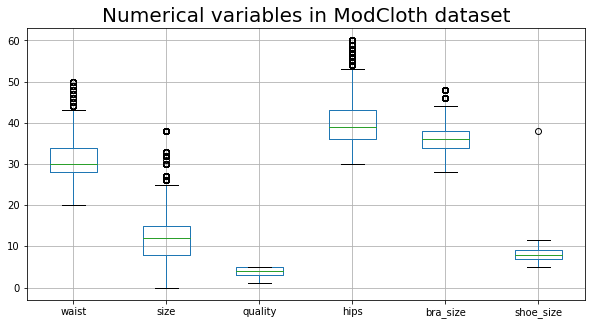

In [9]:
cols = ['waist', 'size', 'quality', 'hips', 'bra_size', 'shoe_size']
plt.figure(figsize=(10,5))
df[cols].boxplot()
plt.title("Numerical variables in ModCloth dataset", fontsize=20)
plt.show()

In [10]:
df[df['shoe_size'] == 38]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498       38.0    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [11]:
df.at[37313, 'shoe_size'] = None
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

<function matplotlib.pyplot.show(*args, **kw)>

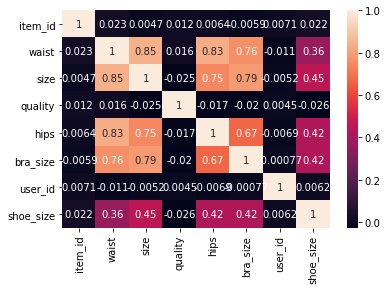

In [12]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

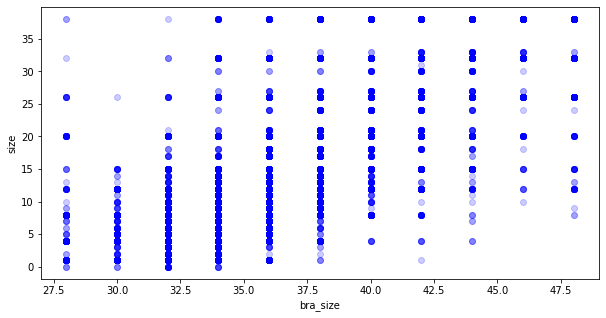

In [13]:
plt.figure(figsize = (10, 5))
plt.xlabel("bra_size")
plt.ylabel("size")
plt.plot(df.bra_size, df['size'], 'bo',alpha = 0.2)
plt.show

# Data cleaning and pre-processing

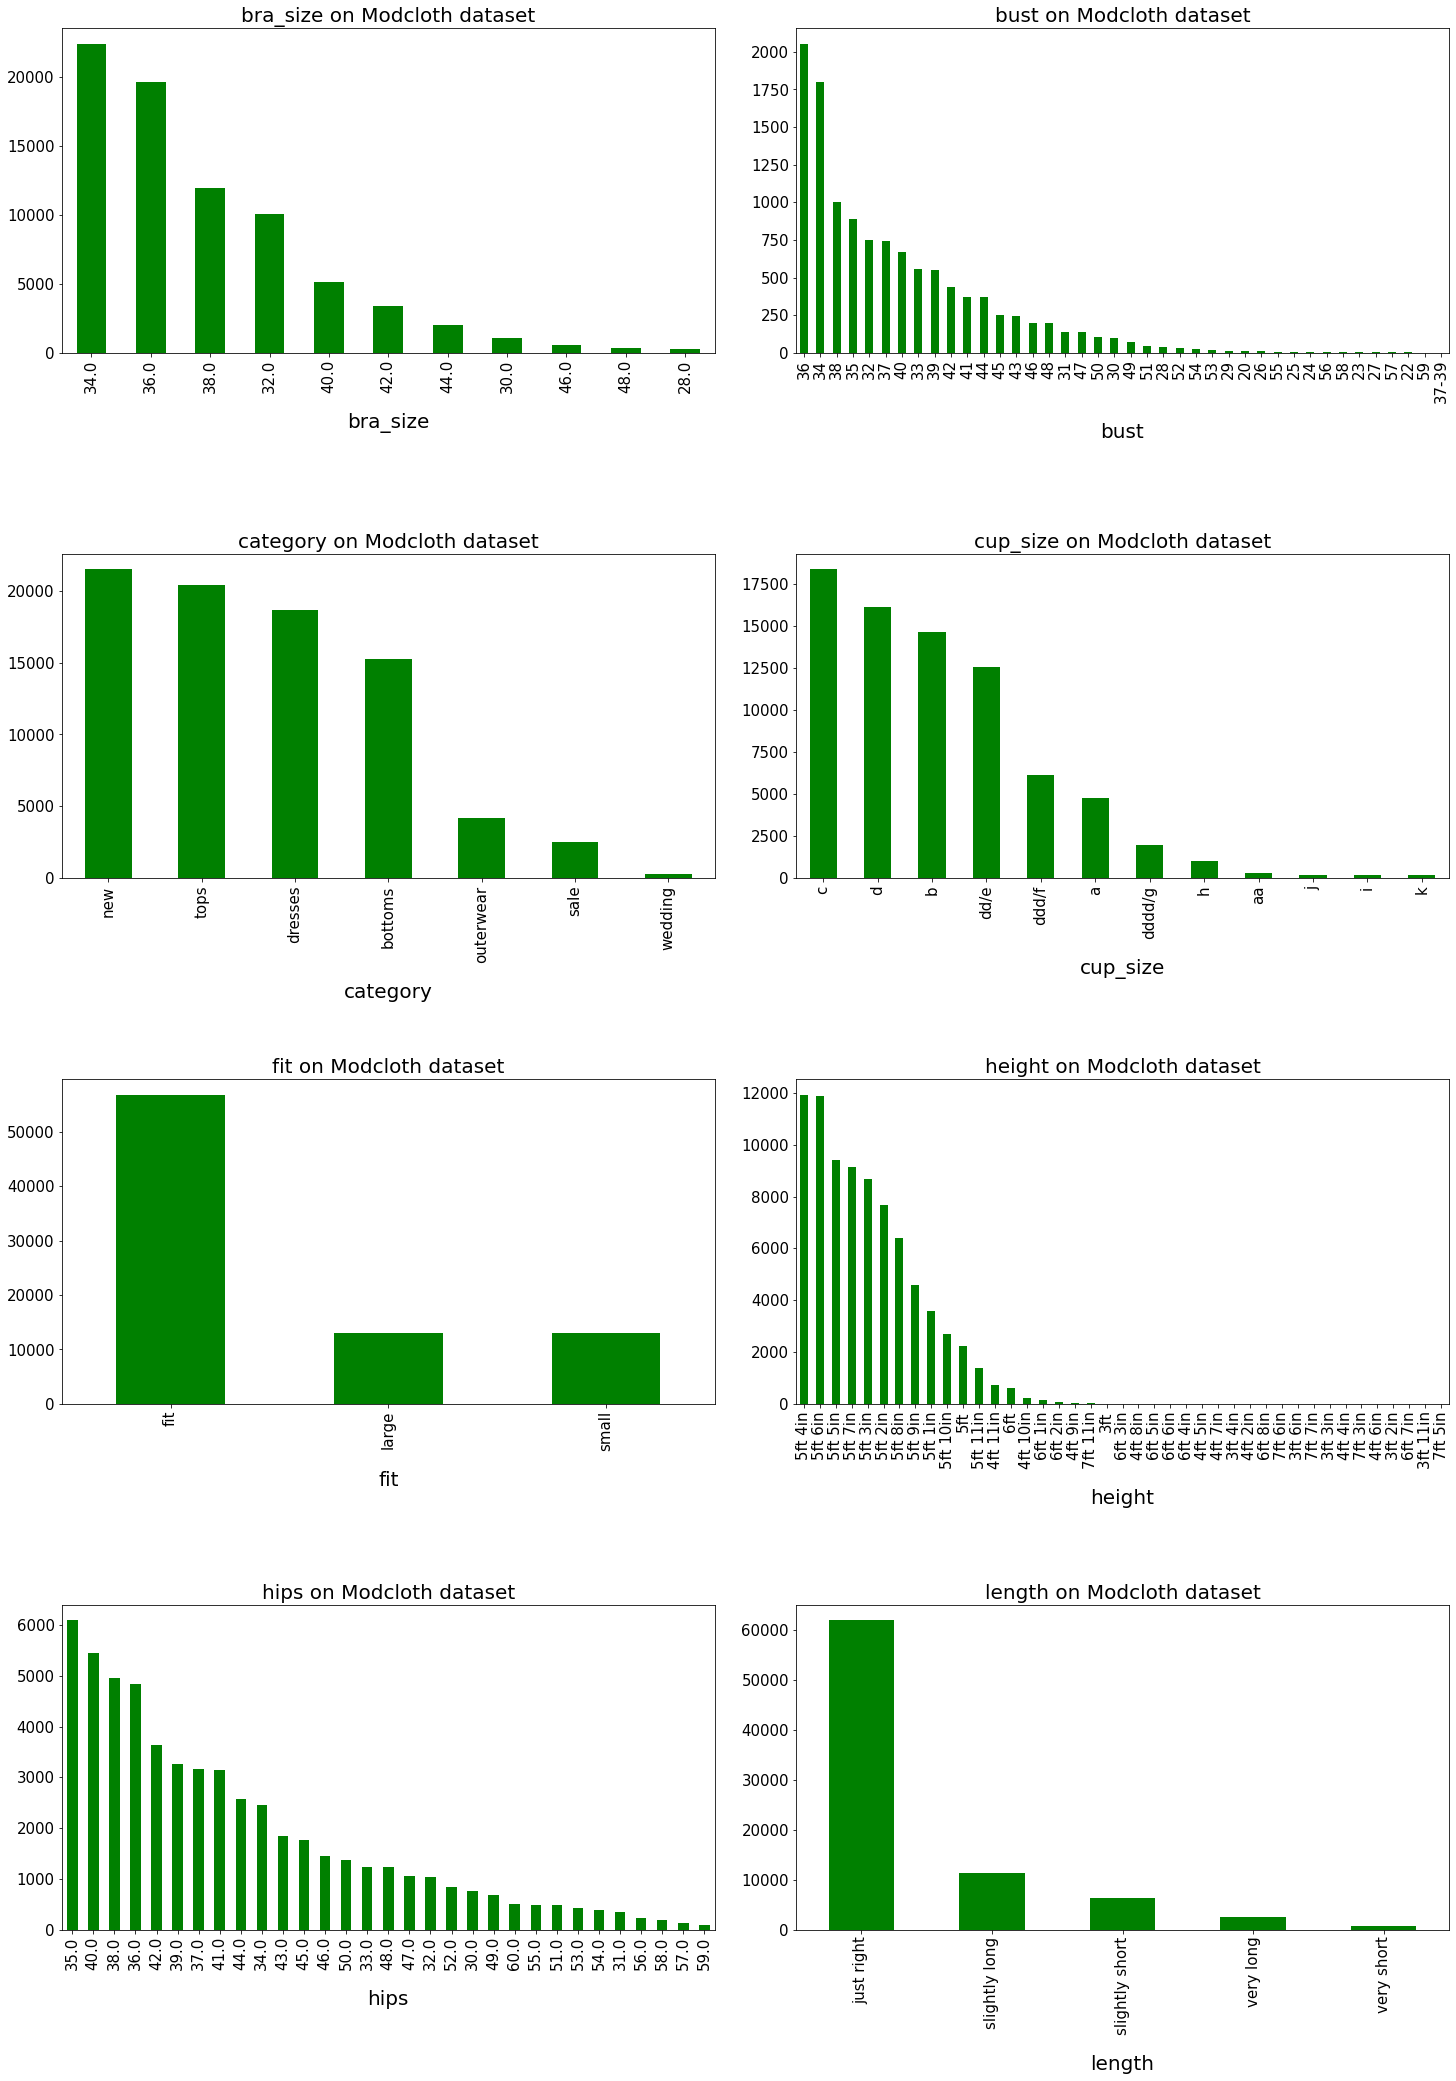

In [14]:
def plot_features(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='g',ax=ax, fontsize=15)
    ax.set_xlabel('{}'.format(col), fontsize=20, labelpad=20.0)
    ax.set_title("{} on Modcloth dataset".format(col), fontsize=20)
    return ax

f, ax = plt.subplots(4,2, figsize=(20,30))
f.tight_layout(h_pad=18, w_pad=5, rect = [0,0.03,1,0.93])
cols = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length']
k=0
for i in range(4):
    for j in range(2):
        plot_features(cols[k], ax[i][j])
        k+=1


In [15]:
df.bust.unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '58', '49', '54', '55', '53', '27',
       '28', '29', '20', '57', '23', '37-39', '24', '59'], dtype=object)

In [16]:
df[df['bust'] == '37-39']

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [17]:
df.at[37313, 'bust'] = statistics.mean([37,39])
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new   38   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [18]:
df.shoe_width.unique()

array([nan, 'wide', 'average', 'narrow'], dtype=object)

In [19]:
def convert_to_cms(x):
    if type(x) != float:
        x = x.split(' ')
        if(len(x) == 2):
            return round((int(x[0][0]) * 30.48 + int(x[1][0]) * 2.54), 2)
        else:
            return round(int(x[0][0]) * 30.48, 2)

In [20]:
df.height = df.height.apply(convert_to_cms)

In [21]:
df.cup_size.fillna("unknown", inplace = True)
df.bra_size.fillna("unknown", inplace = True)

# Feature Engineering

In [22]:
lingerie = (((df.bra_size != "unknown") | (df.cup_size != "unknown")) & (df.height.isnull())
            & (df.hips.isnull()) & (df.shoe_size.isnull()) & (df.shoe_width.isnull()) & (df.waist.isnull()))

shoes = ((df.bra_size == "unknown") & (df.cup_size == "unknown") & (df.height.isnull())
         & (df.hips.isnull()) & ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull()))

dress = ((df.bra_size == "unknown") & (df.cup_size == "unknown") & (df.height.isnull()) & 
         ((df.hips.notnull()) | (df.waist.notnull())) & (df.shoe_size.isnull()) & (df.shoe_width.isnull()))
 
df["first_time_user"] = (lingerie | shoes | dress)


In [ ]:
#First time buyer logic:
#if bra_size/cup_size and other columns null => first time lingerie
#if shoe_size/shoe_width and other columns null => first time shoes
#if hips/waist and other columns null => first time dress/tops

In [23]:
len(df[df['first_time_user'] == True])
#a = df[df['first_time_user'] == True]
#len(a['user_id'].unique())

903

In [24]:
df['first_time_user'].unique()

array([False,  True])

In [27]:
df = df.dropna(subset = ['quality', 'length', 'height'])

In [28]:
df['first_time_user'].unique()

array([False])

In [29]:
df.drop(['bust', 'waist', 'user_name'], inplace=True, axis = 1)

In [30]:
df.shape

(81594, 16)

In [31]:
df.review_summary.fillna("unknown", inplace = True)
df.review_text.fillna("unknown", inplace = True)
df.shoe_size.fillna("unknown", inplace = True)
df.shoe_width.fillna("unknown", inplace = True)
df.hips.fillna("unknown", inplace = True)

In [32]:
df.isna().sum()

item_id            0
size               0
quality            0
cup_size           0
hips               0
bra_size           0
category           0
height             0
length             0
fit                0
user_id            0
shoe_size          0
shoe_width         0
review_summary     0
review_text        0
first_time_user    0
dtype: int64

In [33]:
df.hips.unique()

array([38.0, 30.0, 'unknown', 41.0, 42.0, 50.0, 49.0, 60.0, 36.0, 44.0,
       39.0, 35.0, 34.0, 32.0, 48.0, 52.0, 40.0, 46.0, 37.0, 45.0, 55.0,
       51.0, 33.0, 53.0, 54.0, 47.0, 59.0, 43.0, 57.0, 58.0, 31.0, 56.0],
      dtype=object)

In [34]:
df.shoe_size.unique()

array(['unknown', 9.0, 8.5, 11.0, 7.0, 6.0, 8.0, 6.5, 10.0, 7.5, 5.5, 9.5,
       10.5, 5.0, 11.5], dtype=object)

In [35]:
df.cup_size.unique()

array(['d', 'b', 'c', 'dd/e', 'ddd/f', 'dddd/g', 'i', 'a', 'unknown', 'h',
       'aa', 'j', 'k'], dtype=object)

In [36]:
df.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'length', 'fit', 'user_id', 'shoe_size',
       'shoe_width', 'review_summary', 'review_text', 'first_time_user'],
      dtype='object')

In [37]:
df['category'].unique()

array(['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms',
       'outerwear'], dtype=object)